In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline


In [68]:
df = pd.read_csv("car data.csv")

In [69]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [70]:
df.shape

(301, 9)

In [71]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [72]:
print (df.Seller_Type.unique())
print (df.Transmission.unique())
print (df.Owner.unique())
print (df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [73]:
# check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [75]:
dff = df.iloc[:, 1:]
dff.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
dff.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [77]:
dff["Current_Year"]= 2021
dff.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [78]:
dff["No_Year"]=dff.Current_Year - dff.Year + 1
dff.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,8


In [79]:
# delete Year, Current_Year column
dff.drop(["Year", "Current_Year"],axis=1,inplace=True)

In [80]:
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [81]:
dff = pd.get_dummies(dff, drop_first=True)

In [82]:
dff.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [83]:
dff.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

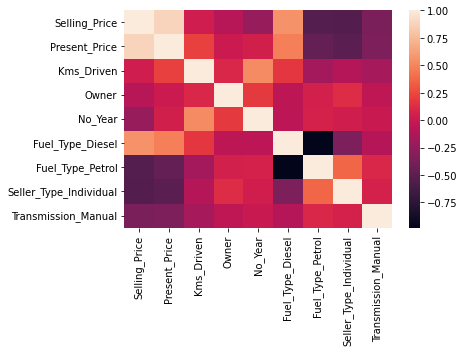

In [96]:
sns.heatmap(dff.corr())

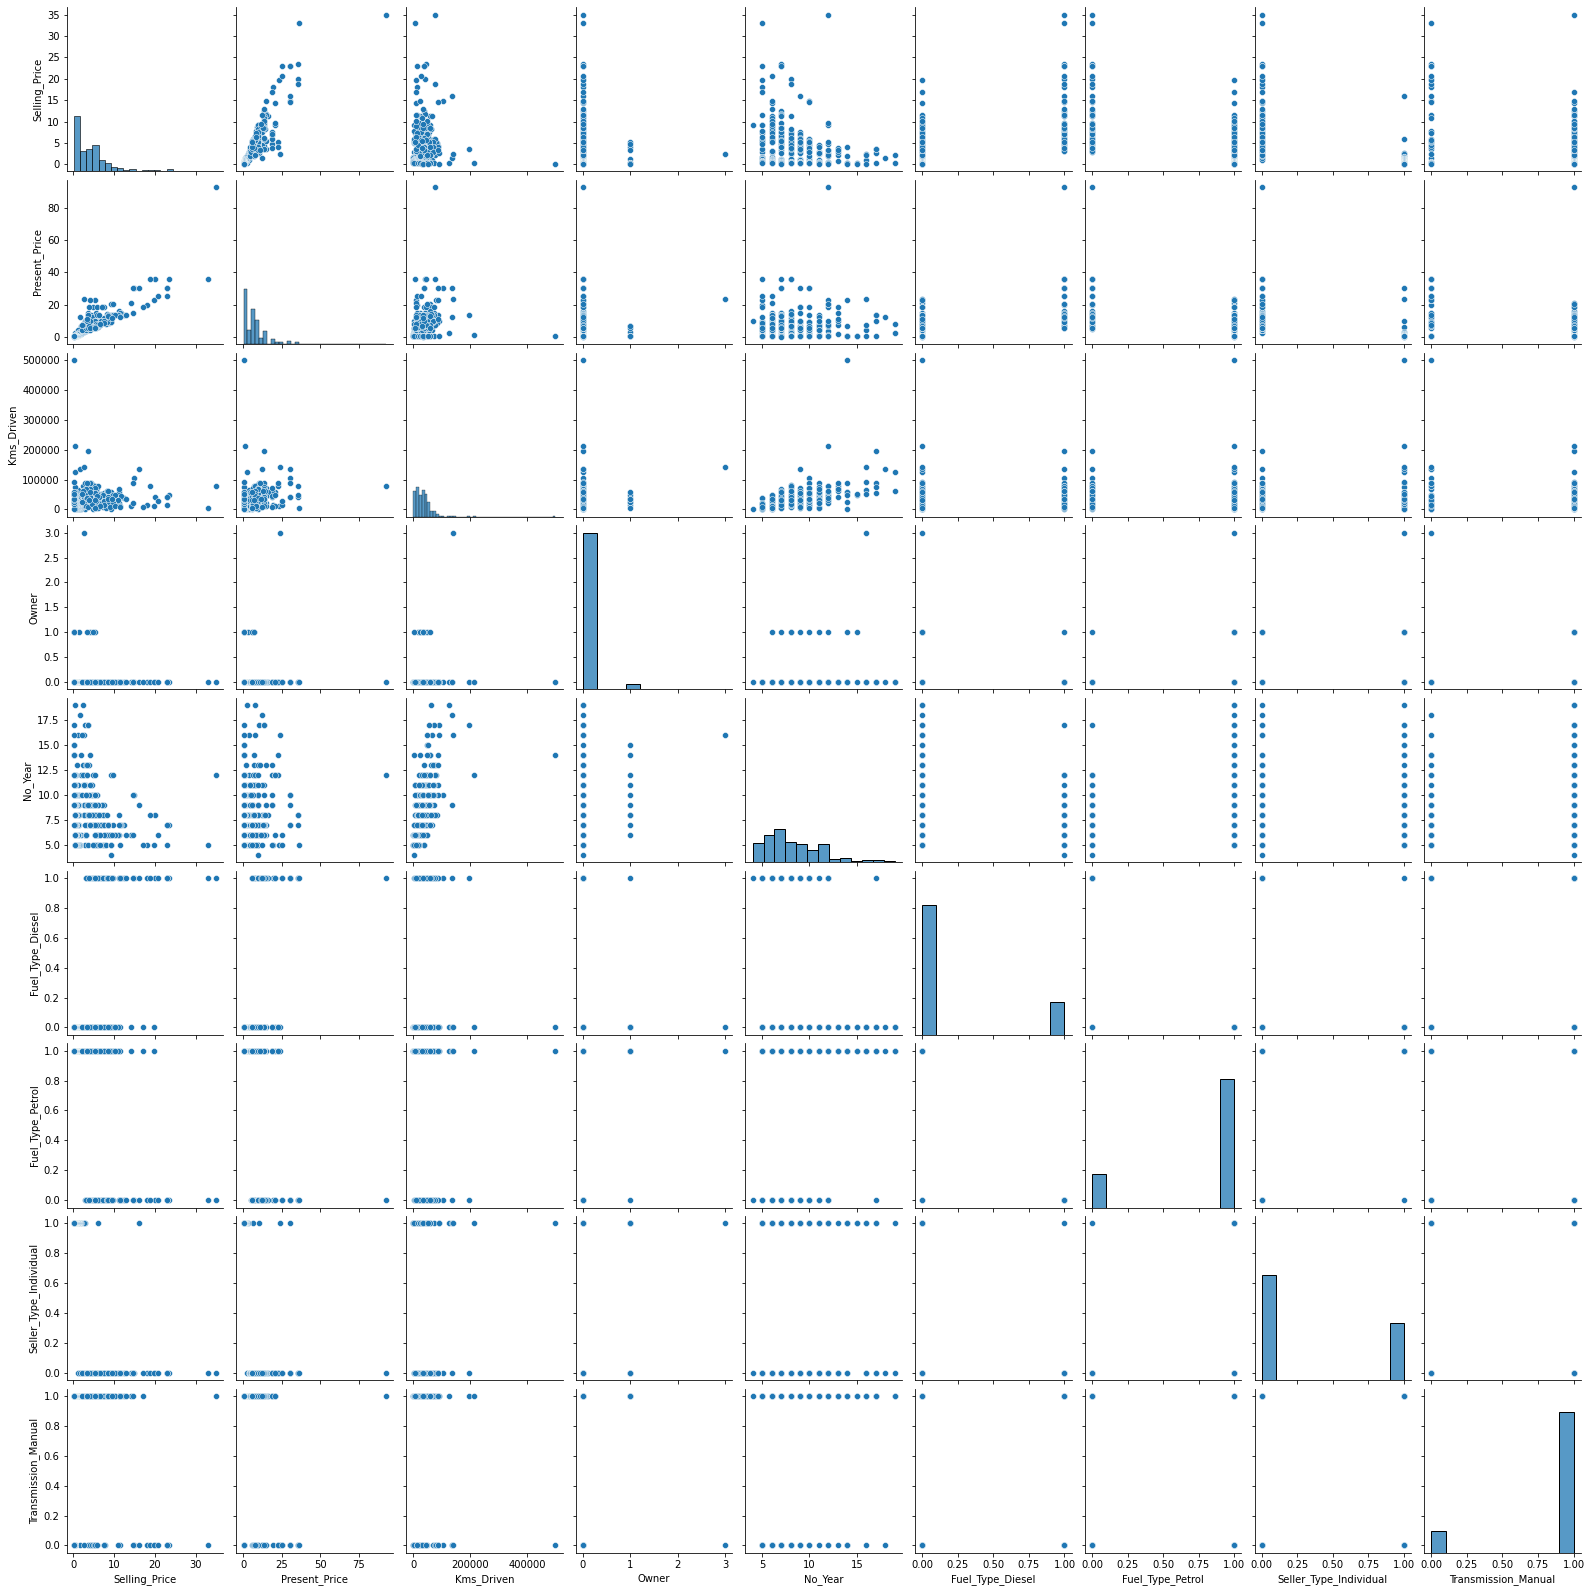

In [91]:
pairplot = sns.pairplot(dff)

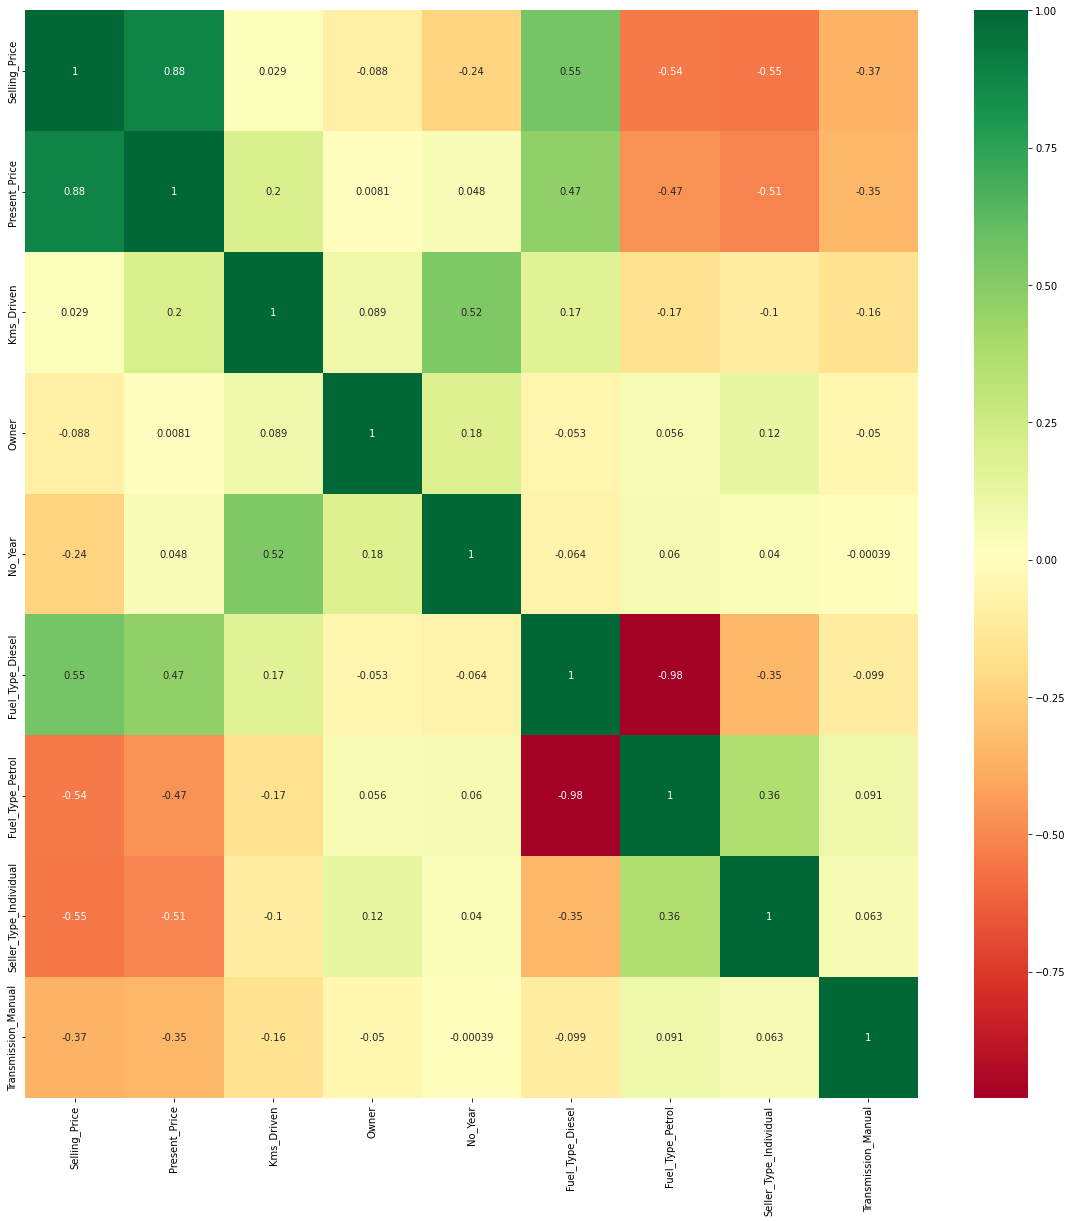

In [94]:
# plot heat map 
corrmat = dff.corr() 
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(dff[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [93]:
corrmat.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [103]:
x = dff.iloc[:, 1:] # all features except selling price
y = dff.iloc[:, 0] # selling price

In [105]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

model.fit(x, y)

ExtraTreesRegressor()

In [106]:
model.feature_importances_

array([0.38383613, 0.04055397, 0.00093744, 0.07885347, 0.2229094 ,
       0.01020426, 0.13061699, 0.13208834])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


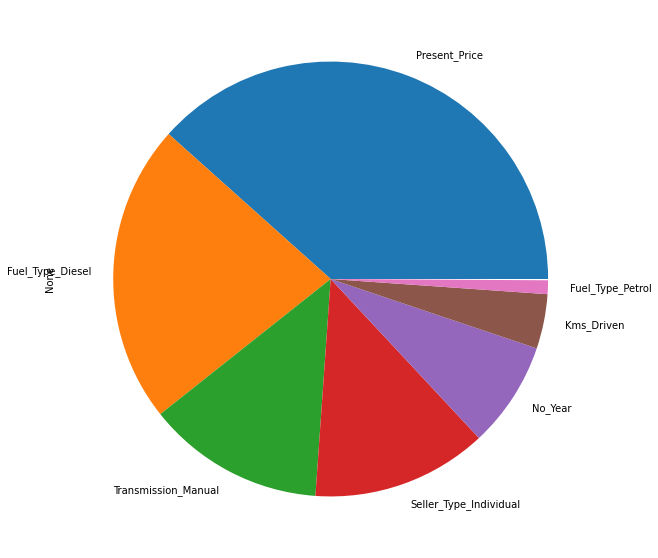

In [126]:
plt.figure(figsize=(10,10))
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(7).plot(kind="pie")
plt.show()

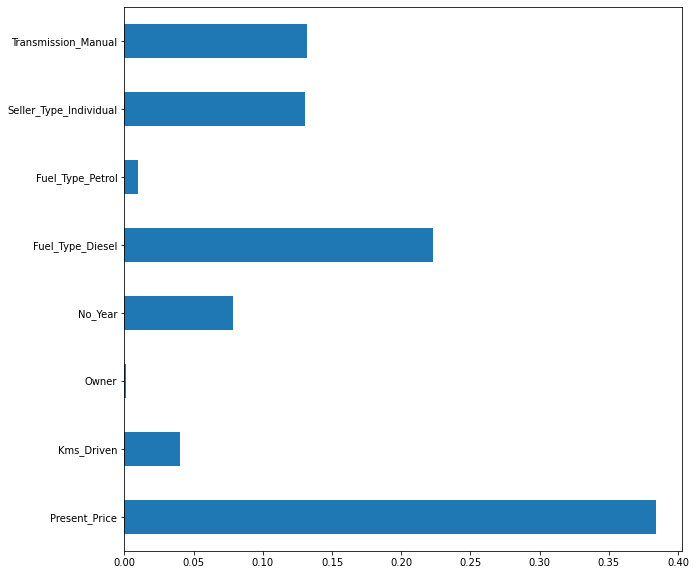

In [122]:
plt.figure(figsize=(10, 10))
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.plot(kind="barh")
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2)

In [128]:
X_train.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
292,8.40,12000,0,6,0,1,0,1
249,7.60,17000,0,6,0,1,0,1
92,13.70,75000,0,17,0,1,0,1
171,0.55,6700,0,7,0,1,1,1
233,5.70,53000,0,9,1,0,0,1


In [129]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor()

In [134]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [135]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [136]:
rf = RandomForestRegressor()

In [137]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)


In [138]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [139]:
# predictions

predictions = rf_random.predict(X_test)

In [140]:
predictions

array([ 2.6975 ,  0.46368,  3.02475,  5.66437,  0.3036 ,  3.22736,
        0.78024,  1.09905, 11.27819,  0.93597,  0.45392,  5.29609,
        0.28756,  8.82615,  3.37366,  0.27558,  5.34141,  5.85925,
        1.26255,  2.87811,  7.68366,  0.58194,  8.72272, 21.99537,
        0.6113 ,  1.17059,  8.71385,  3.69507,  1.13773, 10.64175,
        4.66926,  9.7029 ,  1.28592,  4.85635,  7.68482,  6.723  ,
        1.0914 ,  7.15545,  6.99649,  6.10655,  6.3848 ,  5.01928,
        8.69349,  4.68666,  3.76676,  0.50534,  0.89948,  7.03232,
        4.31955,  4.51472,  0.55982,  5.69291,  1.20981,  3.28335,
        0.6601 ,  0.62802,  0.4281 ,  8.48612,  1.09078,  0.32356,
        3.69865])

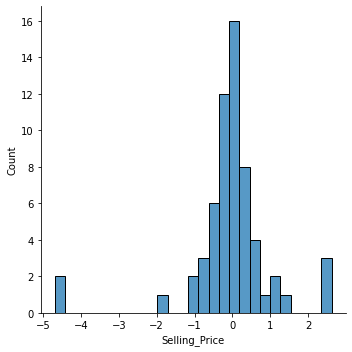

In [141]:
sns.displot(Y_test - predictions)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

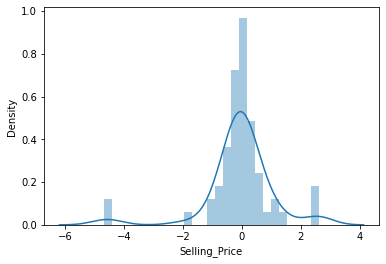

In [142]:
sns.distplot(Y_test - predictions)

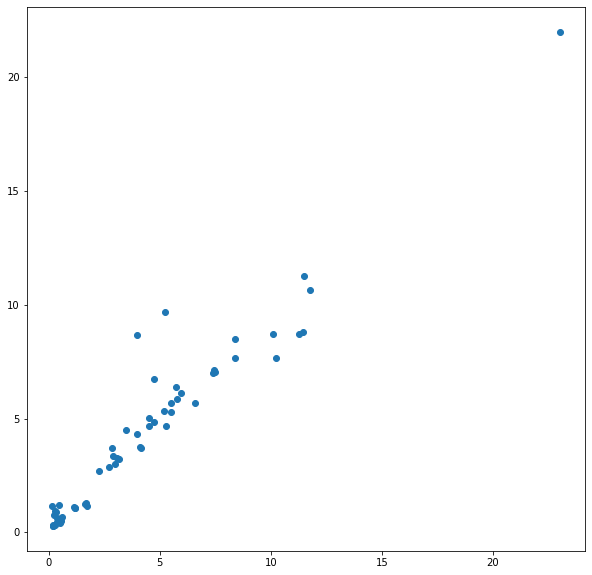

In [149]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predictions)
# plt.plot(predictions)
plt.show()

In [150]:
import pickle

file = open("./random_forest_regressor_model.pkl", "wb")

pickle.dump(rf_random, file)

In [ ]:
!pip3 freeze > requirements.txt